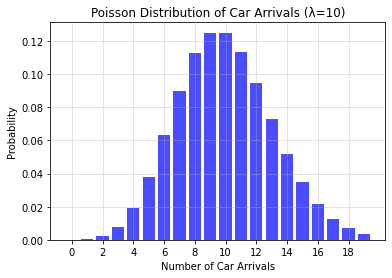

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Setting lambda
lambda_val = 10
x = np.arange(0, 20)  # taking values a bit beyond lambda for a more complete graph
y = poisson.pmf(x, lambda_val)

plt.bar(x, y, color='blue', alpha=0.7)
plt.xlabel('Number of Car Arrivals')
plt.ylabel('Probability')
plt.title('Poisson Distribution of Car Arrivals (λ=10)')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.xticks(np.arange(0, 20, 2))
plt.show()


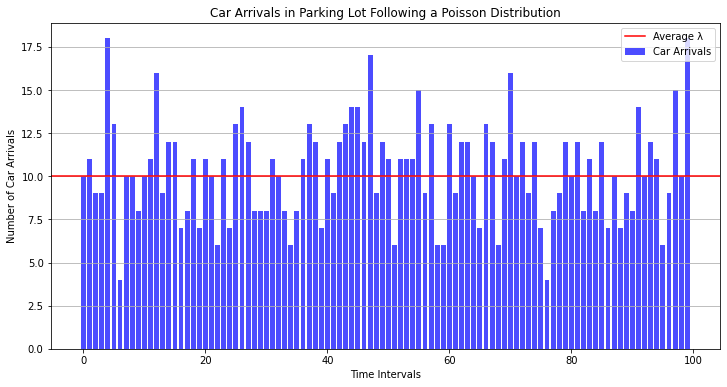

In [2]:
# Set the random seed for reproducibility
np.random.seed(0)

# Parameters
lambda_ = 10  # Average rate of car arrivals
time_intervals = 100  # Number of time intervals

# Generate random car arrivals following a Poisson distribution
car_arrivals = np.random.poisson(lambda_, time_intervals)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(range(time_intervals), car_arrivals, color='blue', alpha=0.7)
plt.axhline(y=lambda_, color='r', linestyle='-')
plt.xlabel('Time Intervals')
plt.ylabel('Number of Car Arrivals')
plt.title('Car Arrivals in Parking Lot Following a Poisson Distribution')
plt.legend(['Average λ', 'Car Arrivals'])
plt.grid(axis='y')
plt.show()


At 50% occupancy:
Average distance (Normal): 26.715922798552473, Average distance (Smart): 13.847004422999598
Average time (Normal): 1.068636911942099 minutes, Average time (Smart): 0.5538801769199839 minutes

At 80% occupancy:
Average distance (Normal): 497.6516052318668, Average distance (Smart): 55.08422512881491
Average time (Normal): 19.906064209274675 minutes, Average time (Smart): 2.2033690051525965 minutes


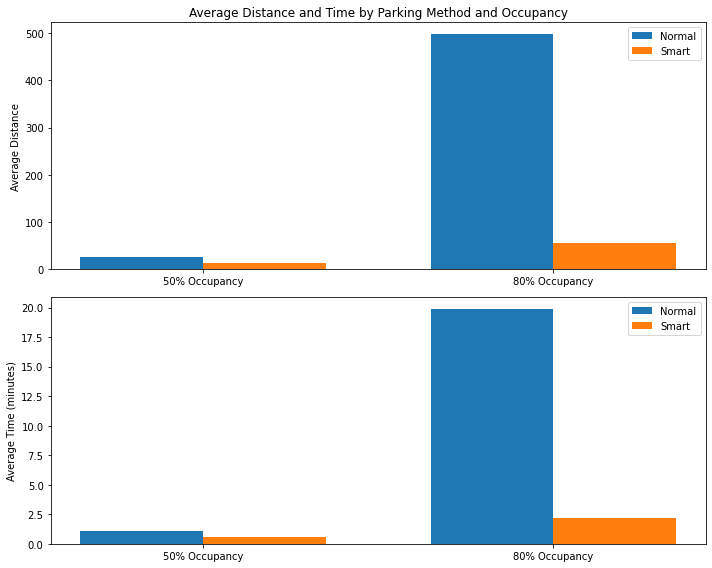

In [9]:
CAR_SPEED = 0.25  # in km/min
SPOT_DISTANCE = 0.01  # in km (10 meters = 0.01 km)
LAMBDA = 10  # Average number of car arrivals per iteration

class ParkingLot:
    def __init__(self, rows, spots_per_row):
        self.rows = rows
        self.spots_per_row = spots_per_row
        self.total_spots = rows * spots_per_row
        self.occupied = np.zeros((rows, spots_per_row), dtype=bool)

    def occupy_spot(self):
        vacant_spots = np.argwhere(self.occupied == False)
        if len(vacant_spots) > 0:
            row, spot = vacant_spots[np.random.choice(len(vacant_spots))]
            self.occupied[row][spot] = True
            return (row, spot)
        return None

    def release_spot(self):
        occupied_spots = np.argwhere(self.occupied)
        if len(occupied_spots) > 0:
            row, spot = occupied_spots[np.random.choice(len(occupied_spots))]
            self.occupied[row][spot] = False
            return (row, spot)
        return None

    def find_nearest_vacant(self):
        vacant_spots = np.argwhere(self.occupied == False)
        if len(vacant_spots) > 0:
            distances = np.sum(vacant_spots**2, axis=1)
            nearest_idx = np.argmin(distances)
            return vacant_spots[nearest_idx]
        return None

def normal_search(parking_lot):
    # Choose random vacant spot
    spot = parking_lot.find_nearest_vacant()
    if spot is not None:
        return spot[0] * parking_lot.spots_per_row + spot[1]
    return parking_lot.total_spots

def smart_search(parking_lot):
    # Find the nearest spot to the entrance (0, 0)
    spot = parking_lot.find_nearest_vacant()
    if spot is not None:
        return spot[1] + 1
    return parking_lot.total_spots

def distance_to_time(distance):
    """Convert distance traveled in the parking lot to time taken."""
    return distance * SPOT_DISTANCE / CAR_SPEED

def simulate_parking(lot_fill_percentage, parking_lot, num_trials=1000):
    normal_distances = []
    smart_distances = []
    
    normal_times = []
    smart_times = []

    # Initially fill the parking lot
    initial_occupied_spots = int(parking_lot.total_spots * lot_fill_percentage / 100)
    for _ in range(initial_occupied_spots):
        parking_lot.occupy_spot()

    for _ in range(num_trials):
        num_arrivals = np.random.poisson(LAMBDA)  # Number of cars arriving based on Poisson distribution
        for _ in range(num_arrivals):
            normal_distance = normal_search(parking_lot)
            smart_distance = smart_search(parking_lot)

            normal_distances.append(normal_distance)
            smart_distances.append(smart_distance)

            normal_times.append(distance_to_time(normal_distance))
            smart_times.append(distance_to_time(smart_distance))
            
            parking_lot.occupy_spot()
            parking_lot.release_spot()

    return (10*np.mean(normal_distances), 10*np.mean(smart_distances),
            10*np.mean(normal_times), 10*np.mean(smart_times))

def main():
    parking_lot = ParkingLot(10, 10)
    results_50 = simulate_parking(50, parking_lot)
    results_80 = simulate_parking(80, parking_lot)

    # Results
    print(f"At 50% occupancy:")
    print(f"Average distance (Normal): {results_50[0]}, Average distance (Smart): {results_50[1]}")
    print(f"Average time (Normal): {results_50[2]} minutes, Average time (Smart): {results_50[3]} minutes")

    print(f"\nAt 80% occupancy:")
    print(f"Average distance (Normal): {results_80[0]}, Average distance (Smart): {results_80[1]}")
    print(f"Average time (Normal): {results_80[2]} minutes, Average time (Smart): {results_80[3]} minutes")

    # Visualization for distances
    labels = ['50% Occupancy', '80% Occupancy']
    avg_distance_normal = [results_50[0], results_80[0]]
    avg_distance_smart = [results_50[1], results_80[1]]

    # Visualization for time taken
    avg_time_normal = [results_50[2], results_80[2]]
    avg_time_smart = [results_50[3], results_80[3]]

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

    # Bar chart for distance
    x = np.arange(len(labels))
    width = 0.35
    rects1 = ax1.bar(x - width/2, avg_distance_normal, width, label='Normal')
    rects2 = ax1.bar(x + width/2, avg_distance_smart, width, label='Smart')
    ax1.set_ylabel('Average Distance')
    ax1.set_title('Average Distance and Time by Parking Method and Occupancy')
    ax1.set_xticks(x)
    ax1.set_xticklabels(labels)
    ax1.legend()

    # Bar chart for time taken
    rects3 = ax2.bar(x - width/2, avg_time_normal, width, label='Normal')
    rects4 = ax2.bar(x + width/2, avg_time_smart, width, label='Smart')
    ax2.set_ylabel('Average Time (minutes)')
    ax2.set_xticks(x)
    ax2.set_xticklabels(labels)
    ax2.legend()

    fig.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()